# Help a metropolitan bicycle sharing system to find out how many bicycles need to be ready at a given time

Data was taken from https://www.kaggle.com/c/bike-sharing-demand/data

This notebook focuses on data visualization. Calculations can be found in the bikeSharing_calculation file.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

In [5]:
#load train.csv data from kaggle into notebook
df = pd.read_csv('data/train.csv', index_col=0, parse_dates=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Counts per temperature

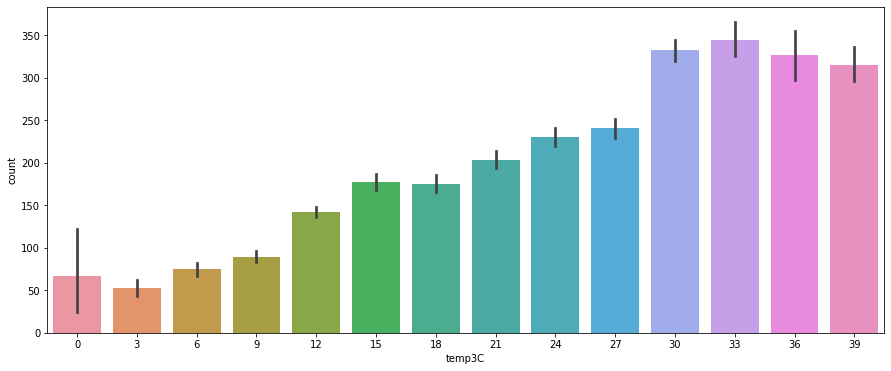

In [6]:
"""First (and only for displaying purpose!):
Create a new column "temp3C" for 3 °C intervals"""
df['temp3C'] = (df['temp']//3*3).astype(int)
plt.figure(figsize=[15,6])
sns.barplot(x='temp3C',y='count', data=df[['temp3C','count']])

## Counts per temperature in dependence of workingday 

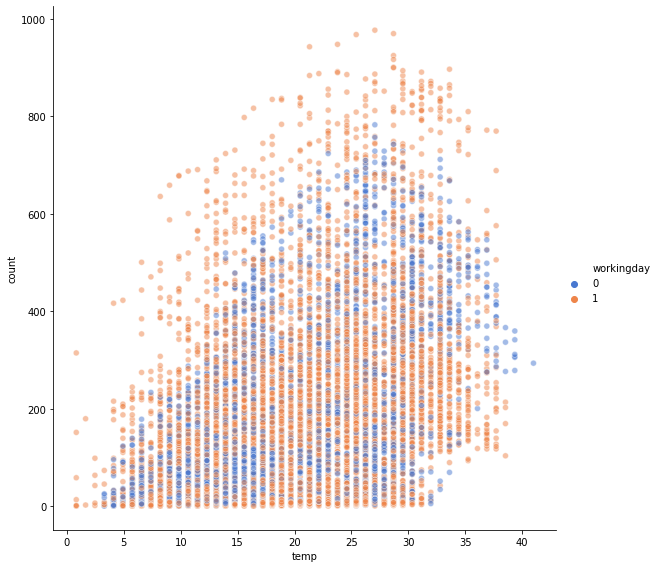

In [7]:
#sns.set(style='white')
sns.relplot(data=df[['count','temp','workingday']],
            x='temp', 
            y='count', 
            hue='workingday',             
            sizes=(5,5), alpha=.5, palette='muted', height=8 )

## Counts per windspeed

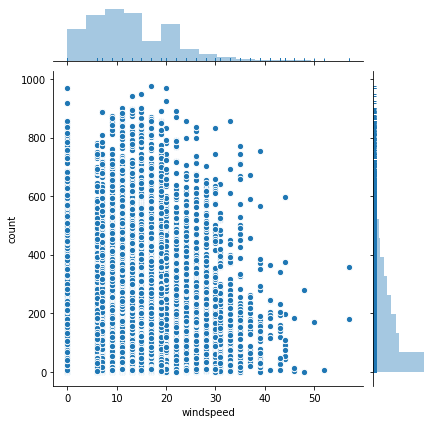

In [8]:
sns.jointplot("windspeed", "count", data=df,
                  marginal_kws=dict(bins=15, rug=True),
                  annot_kws=dict(stat="r"),
                  s=40, edgecolor="w", linewidth=1)

## Counts per humidity

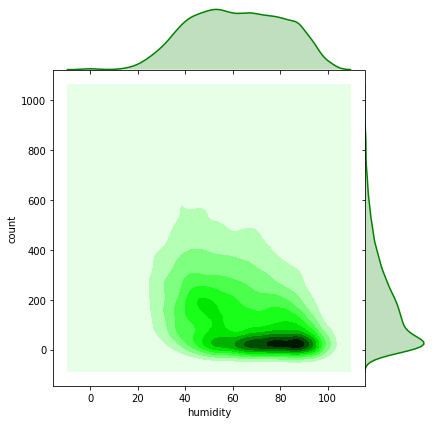

In [9]:
sns.jointplot("humidity", "count", data=df,
                  kind="kde", space=0, color="g")

## Comparison registered vs casual

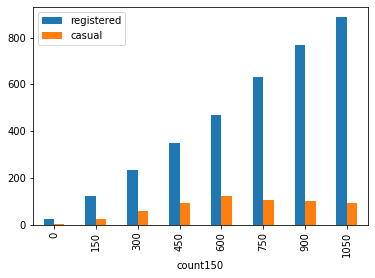

In [10]:
"""First (and only for displaying purpose!):
Create a new column "count150" for 150 count intervals"""

df['count150'] = (round(df['count']/150)*150).astype(int)

registered_casual = df.groupby('count150')[['registered', 'casual']].mean()
registered_casual.plot.bar()

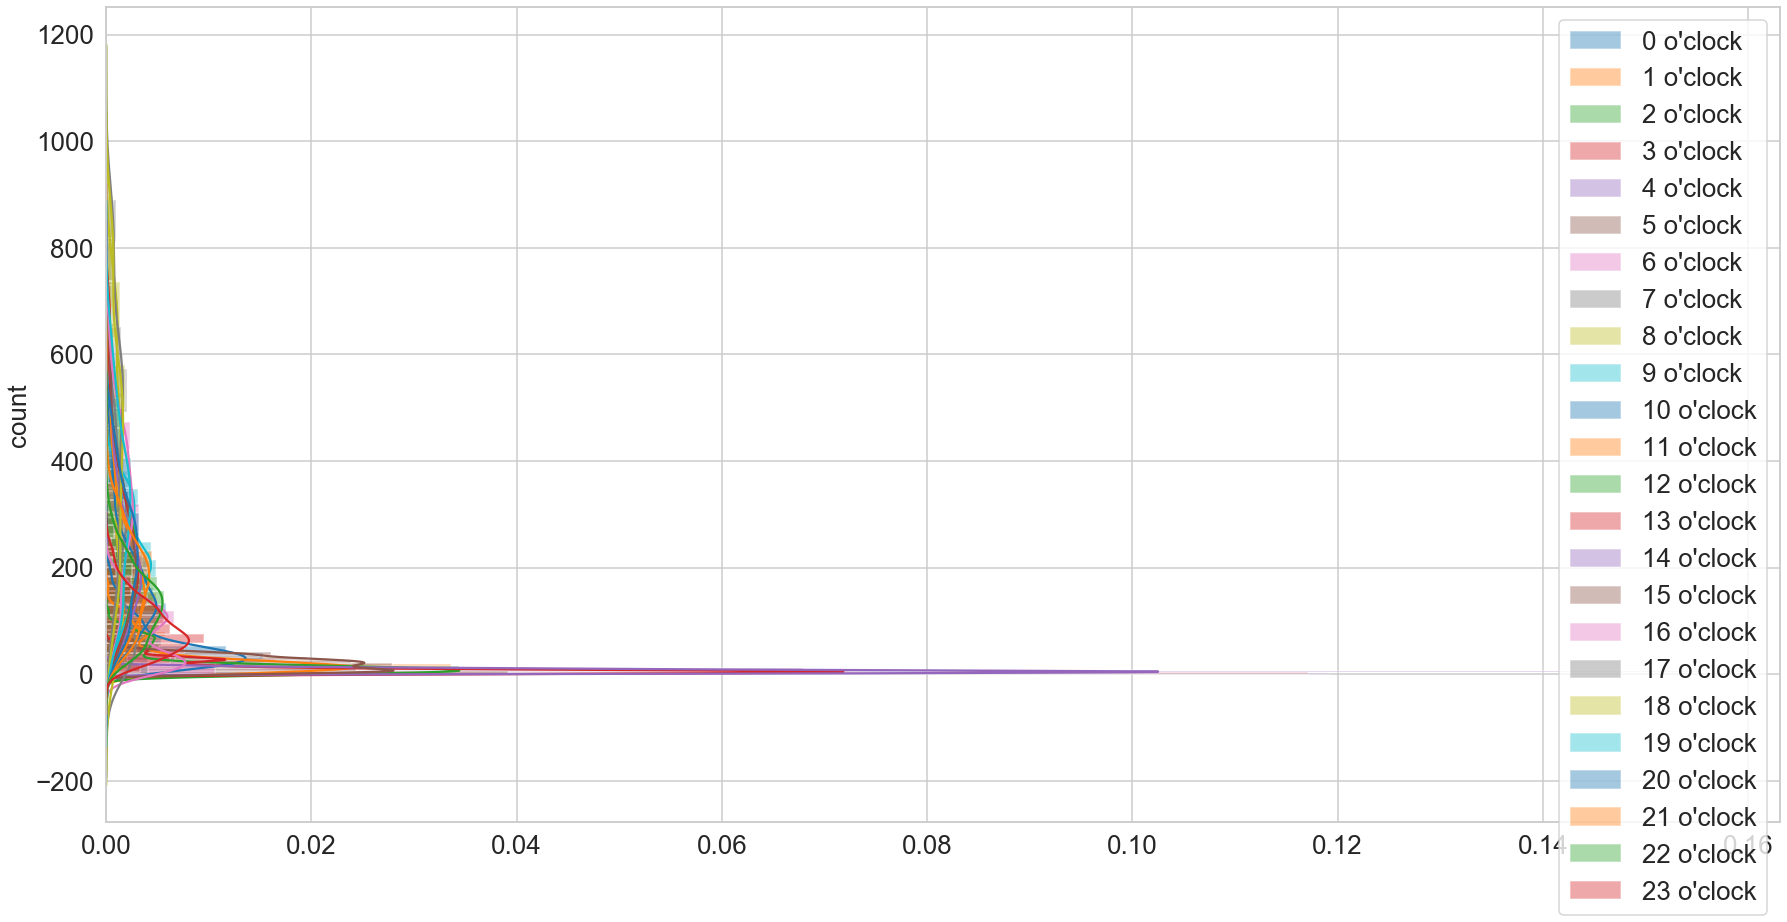

In [75]:
df['hour'] = df.index.hour
df['year'] = df.index.year

# distribution plot (every hour)
for i in df['hour'].unique():
    x = df.loc[df['hour']==i]
    ax = sns.distplot(x['count'], vertical=True, label = str(i)+" o'clock")
plt.legend()

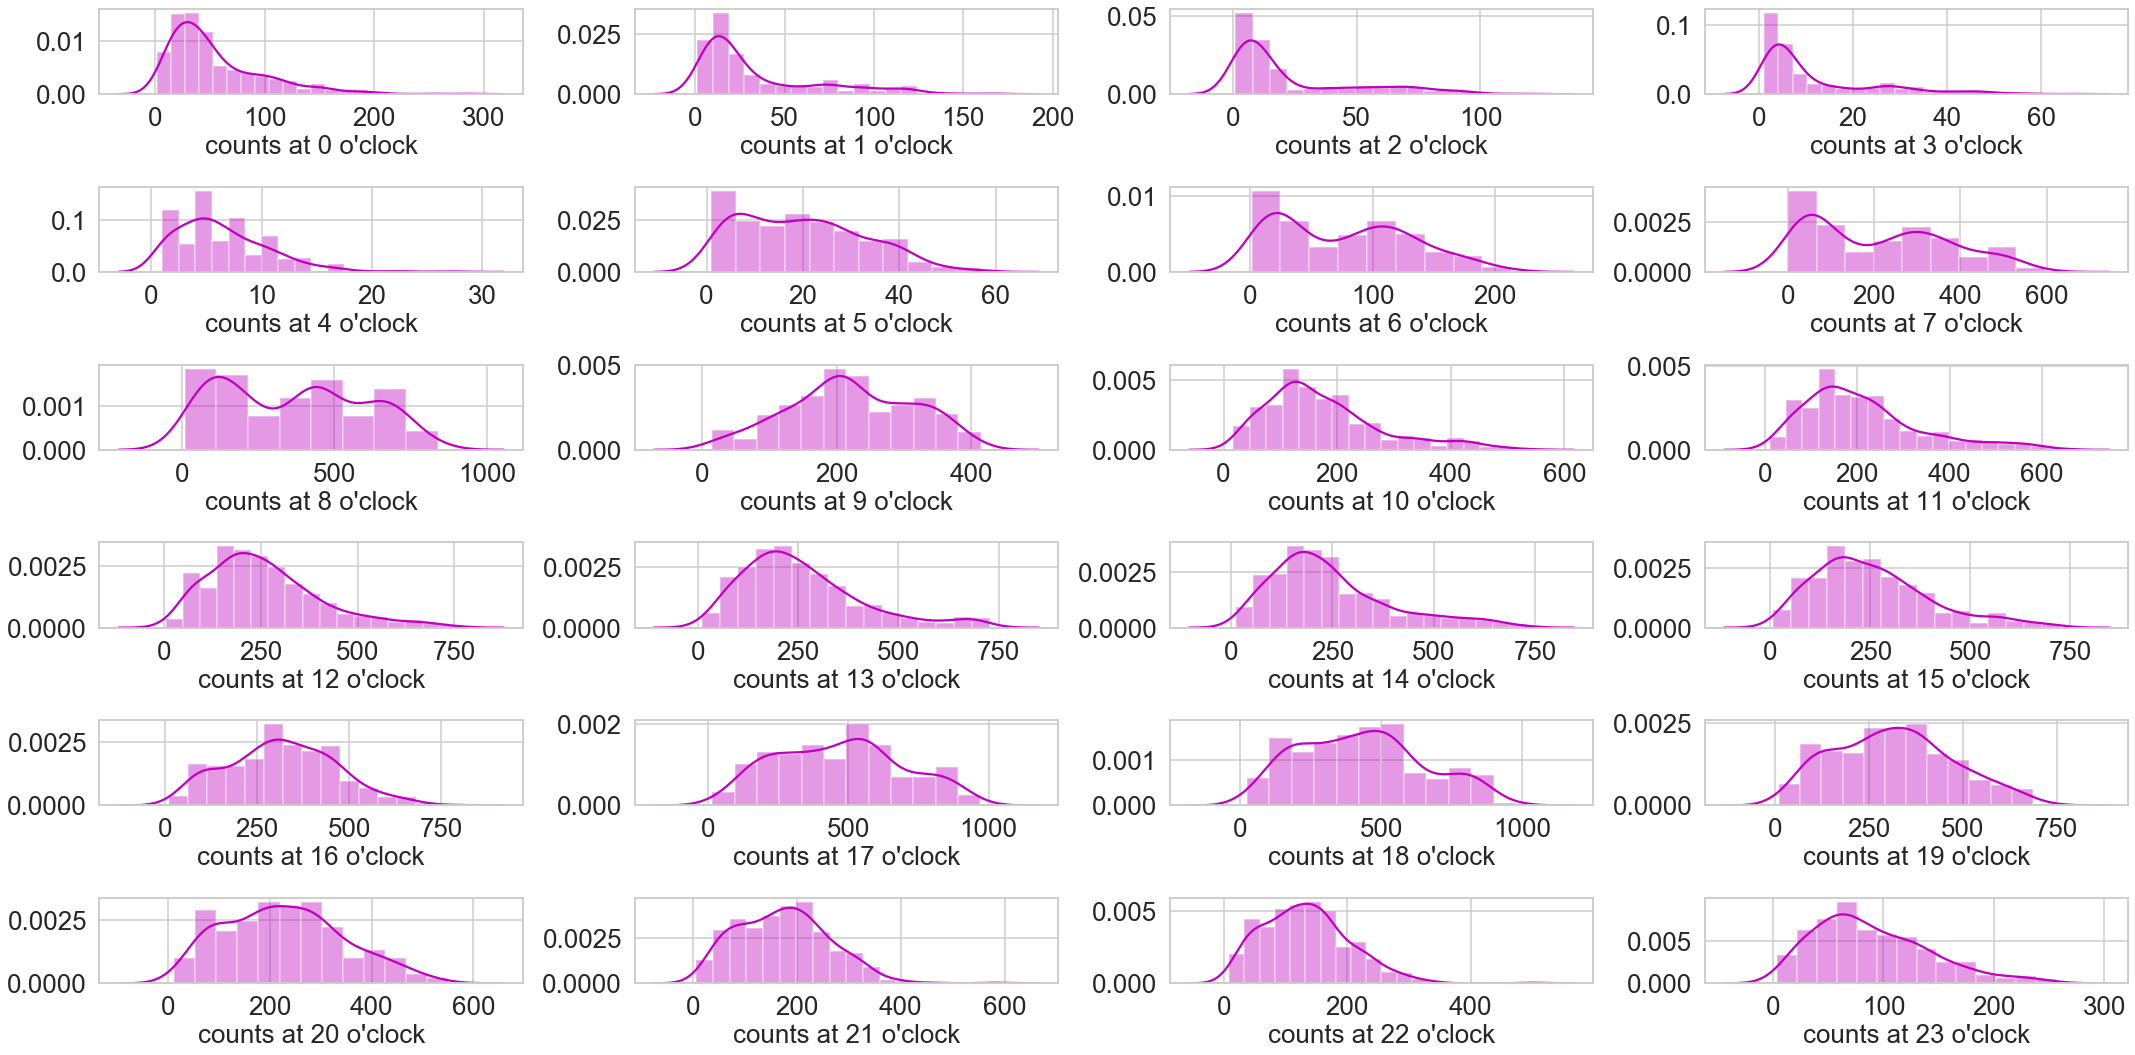

In [64]:
# distribution plots per hour separately 
for i,elem in enumerate(df['hour'].unique()):
    x = df.loc[df['hour']==i]
    plt.subplot(6,4,i+1)
    sns.distplot(x['count'], color = 'm')
    plt.xlabel('counts at '+ str(elem) + str(" o'clock") )
    plt.tight_layout()    

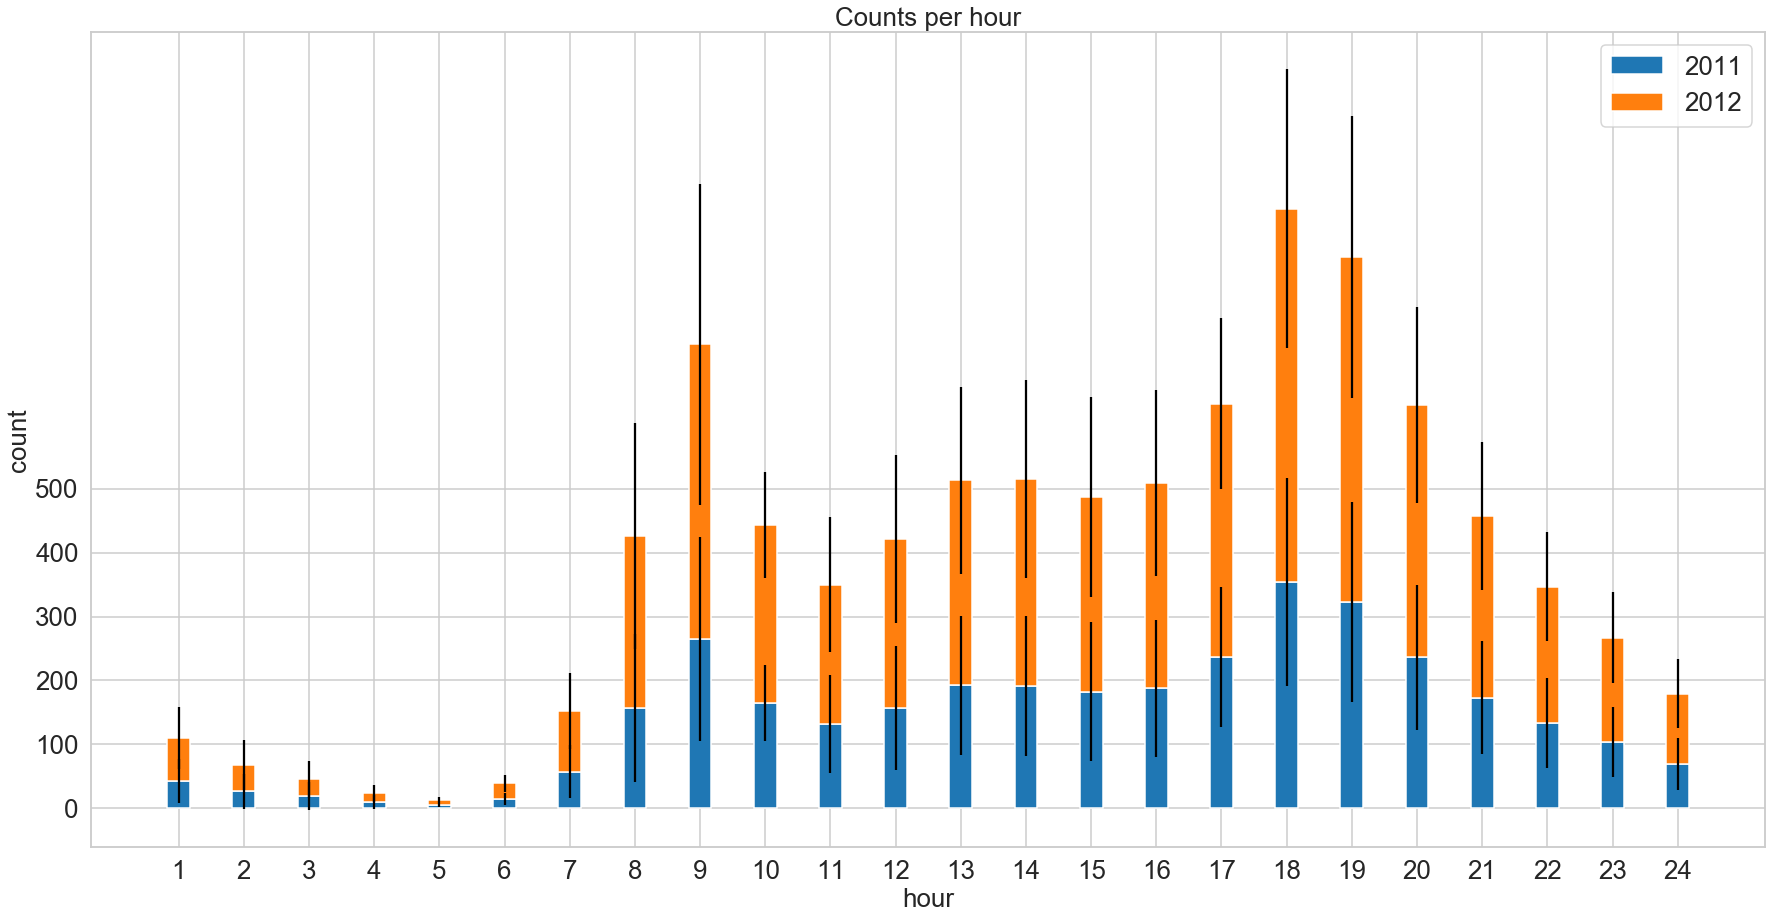

In [35]:
#stacked bar plot (years 2011 and 2012)
df_year_hour = df[['year', 'hour', 'count']]
intermediate = df_year_hour.groupby(['year','hour'])
mean_yh = intermediate.mean()
std_yh = intermediate.std()

means2011h = mean_yh.loc[2011]
means2012h = mean_yh.loc[2012]
std2011h = std_yh.loc[2011]
std2012h = std_yh.loc[2012]

ind = np.arange(1,25)
width = 0.35

p1=plt.bar(ind, means2011h['count'], width, yerr = std2011h['count'])
p2=plt.bar(ind, means2012h['count'], width, yerr = std2012h['count'], bottom=means2011h['count'])
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Counts per hour')
plt.xticks(ind, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                 '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'))
plt.yticks(np.arange(0,501,100))
plt.legend((p1[0],p2[0]),('2011','2012'))
plt.show()

## Counts per month and season

In [12]:
# get a new column for month out of datetime index:
df['month'] = df.index.month
#Create a new column "month2M" for 2months-ranges:
df['month2M'] = df['month'].resample('2M', closed="left").transform('first')

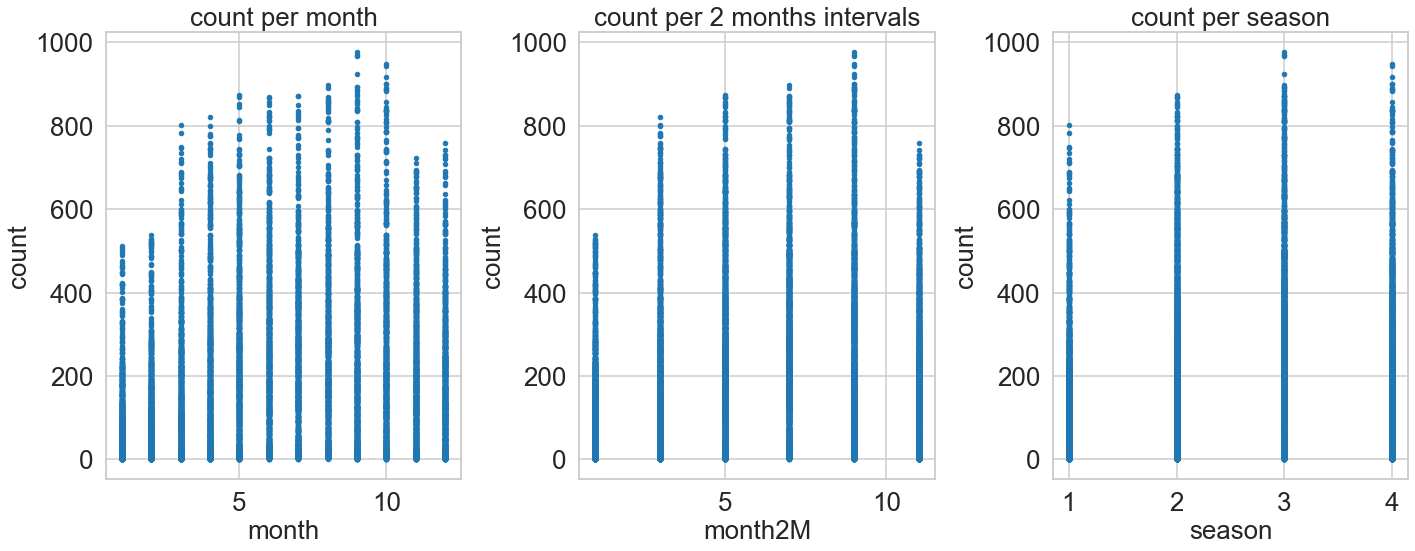

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.plot(df['month'], df['count'],'.')
plt.title('count per month')
plt.xlabel('month')
plt.ylabel('count')

plt.subplot(1,3,2)
plt.plot(df['month2M'], df['count'],'.')
plt.title('count per 2 months intervals')
plt.xlabel('month2M')
plt.ylabel('count')

plt.subplot(1,3,3)
plt.plot(df['season'], df['count'],'.')
plt.title('count per season')
plt.xlabel('season')
plt.ylabel('count')

plt.tight_layout()
plt.show()

## Monthly wise per hour

[Text(0.5, 1.0, 'Monthly wise hourly distribution of counts')]

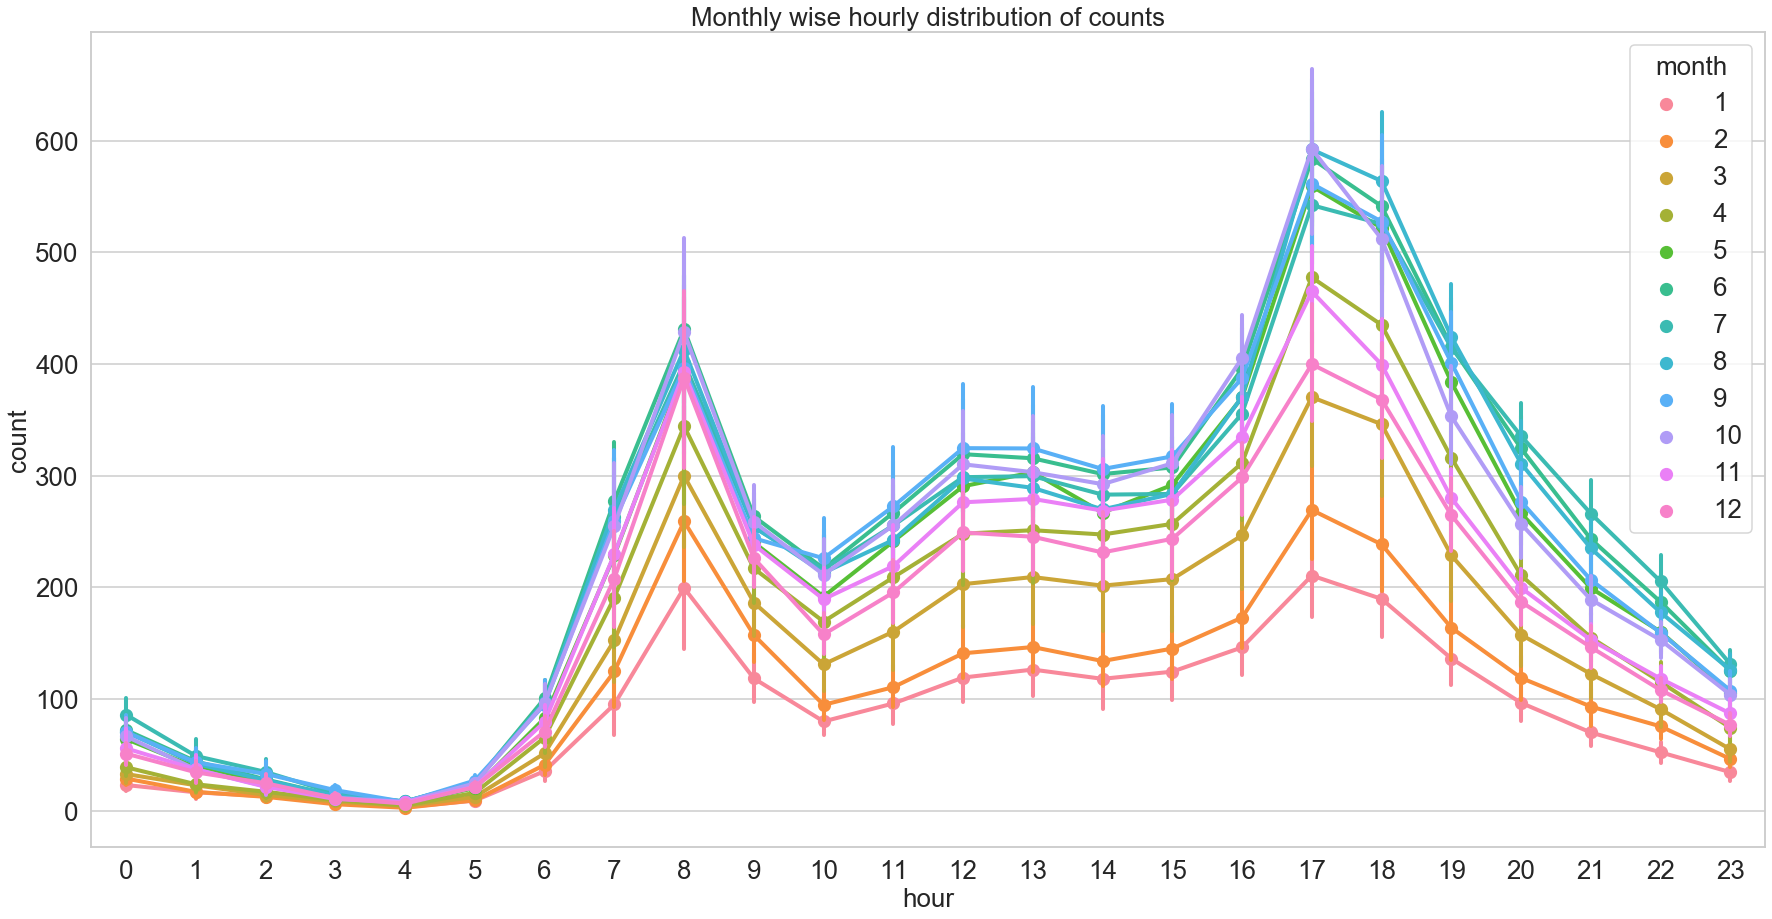

In [30]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 15),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'          
         }
plt.rcParams.update(params)

fig,ax=plt.subplots()
sns.pointplot(data=df[['count', 'month', 'hour']],
             x='hour',
             y='count',
             hue='month',
             ax=ax)
ax.set(title='Monthly wise hourly distribution of counts')

## Counts per day of the week

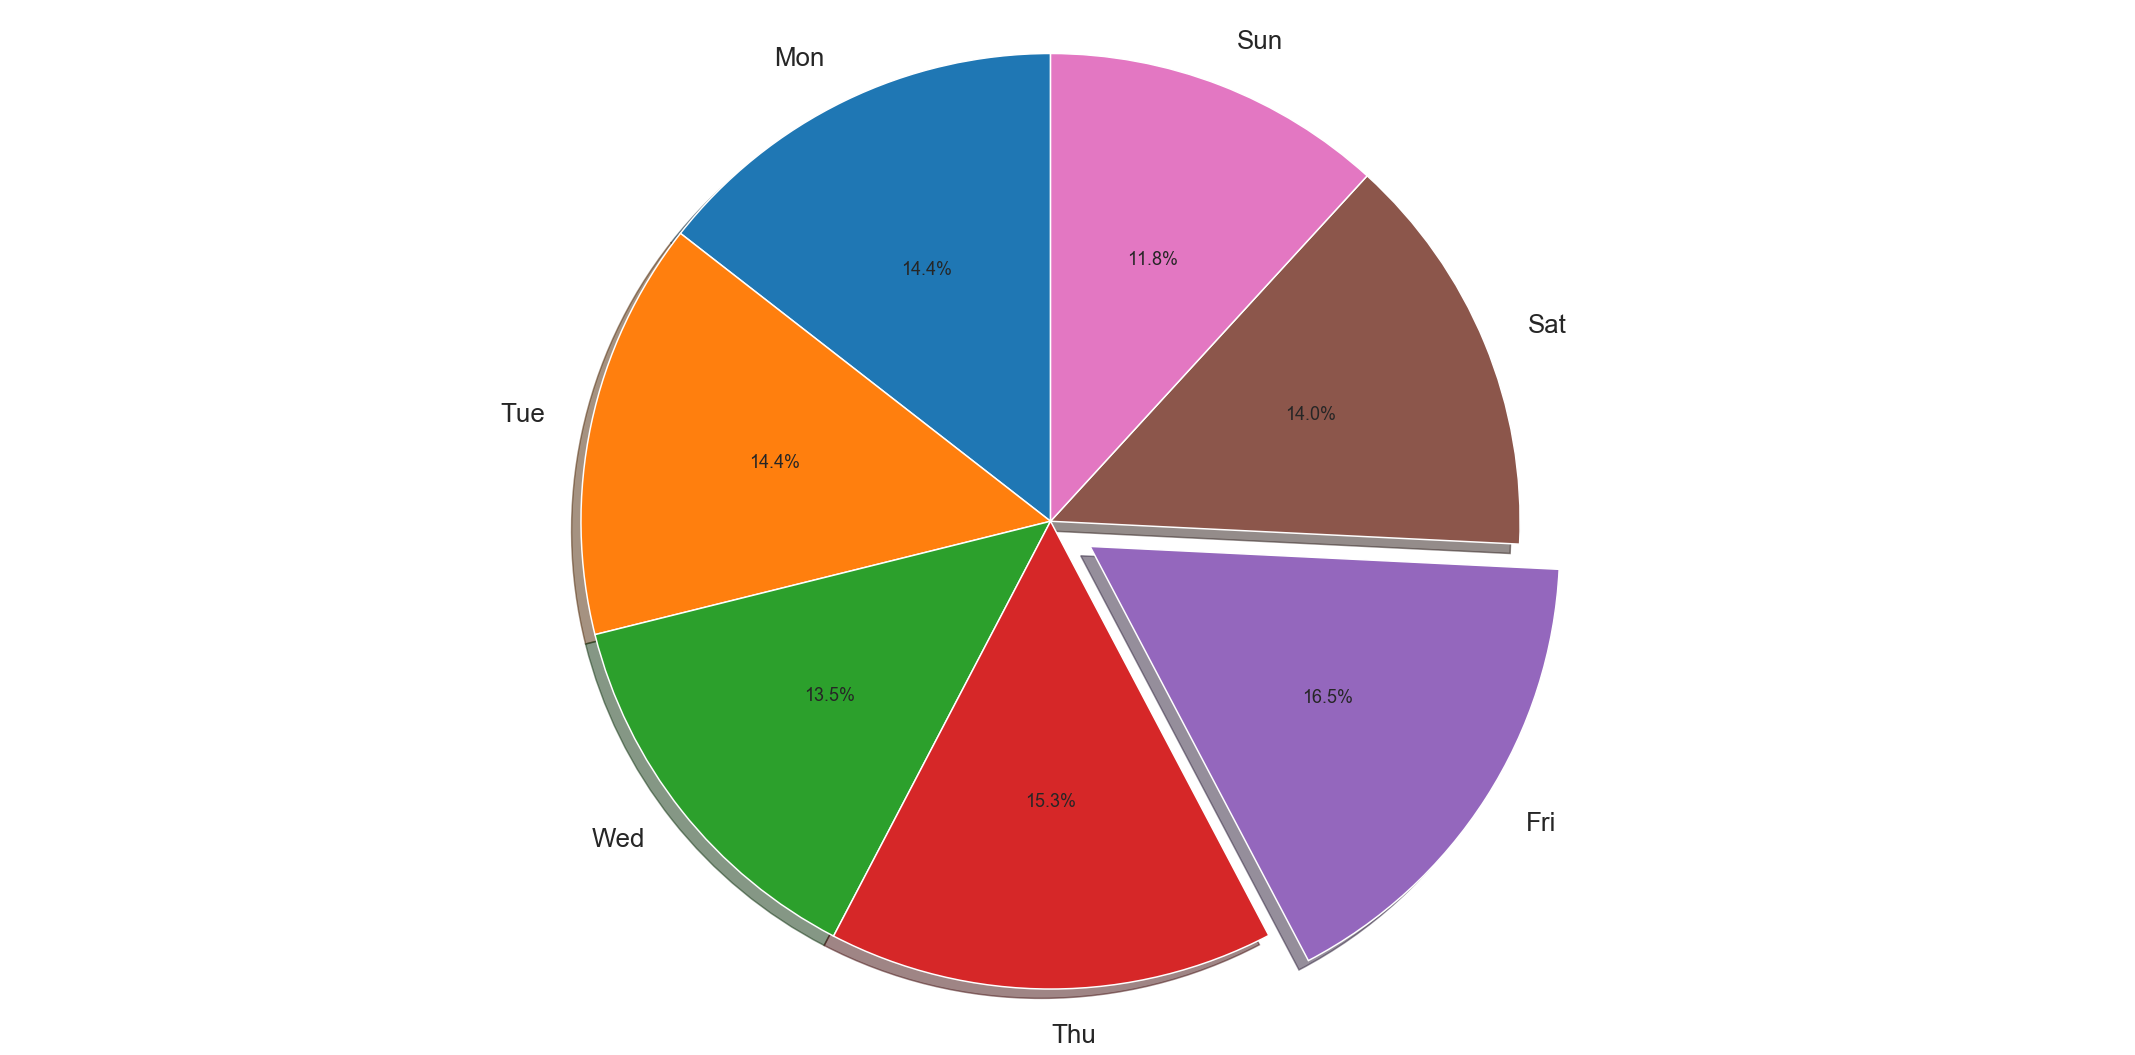

In [54]:
df['dayOfWeek'] = df.index.dayofweek

df_day = df[['dayOfWeek','count']]
# calculate median, sum, percentage 
day_general = df_day.groupby(['dayOfWeek']).median()
day_sum = day_general['count'].sum()
df_day_percent = day_general / day_sum * 100
# rename index
df_day_percent.rename(index={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 
                             4:'Fri', 5:'Sat', 6:'Sun'}, inplace=True)


# pie plot
labels = df_day_percent.index
fracs = df_day_percent['count']

# only "explode" the 4th slice
explode = (0, 0, 0, 0, 0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Workingday vs holiday

[Text(0.5, 1.0, 'Weekly wise hourly distribution of counts')]

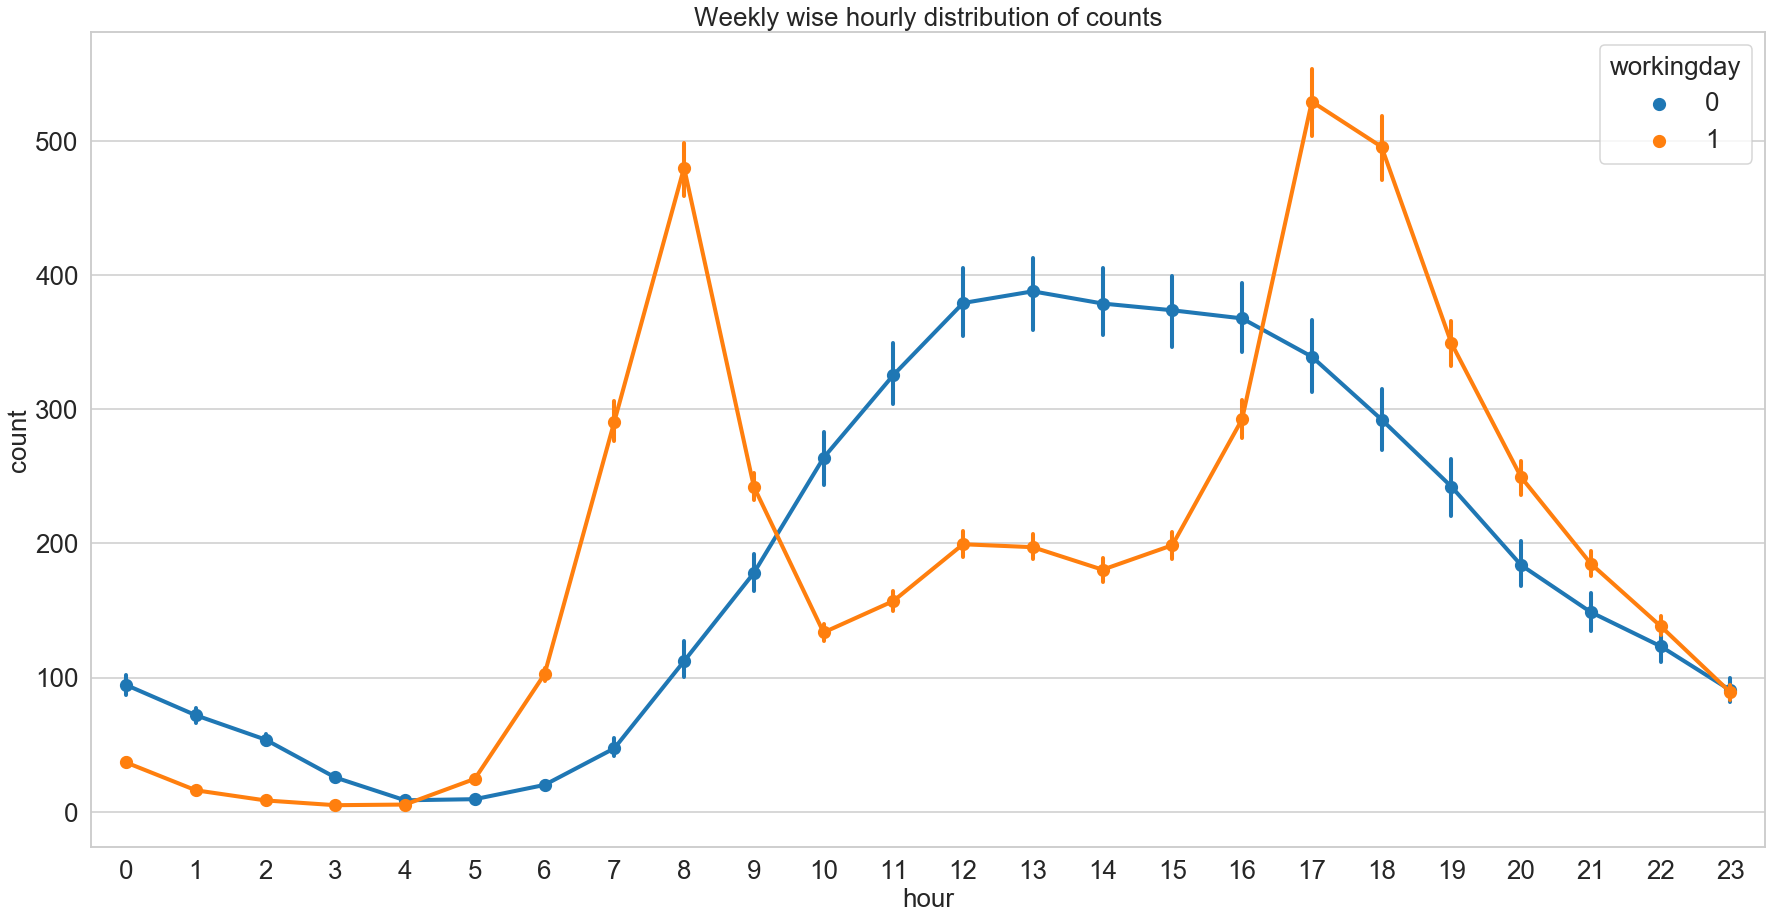

In [32]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 15),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'          
         }
plt.rcParams.update(params)

fig,ax=plt.subplots()
sns.pointplot(data=df[['count', 'workingday', 'hour']],
             x='hour', y='count',
             hue='workingday', ax=ax)
ax.set(title='Weekly wise hourly distribution of counts')

## Counts per month

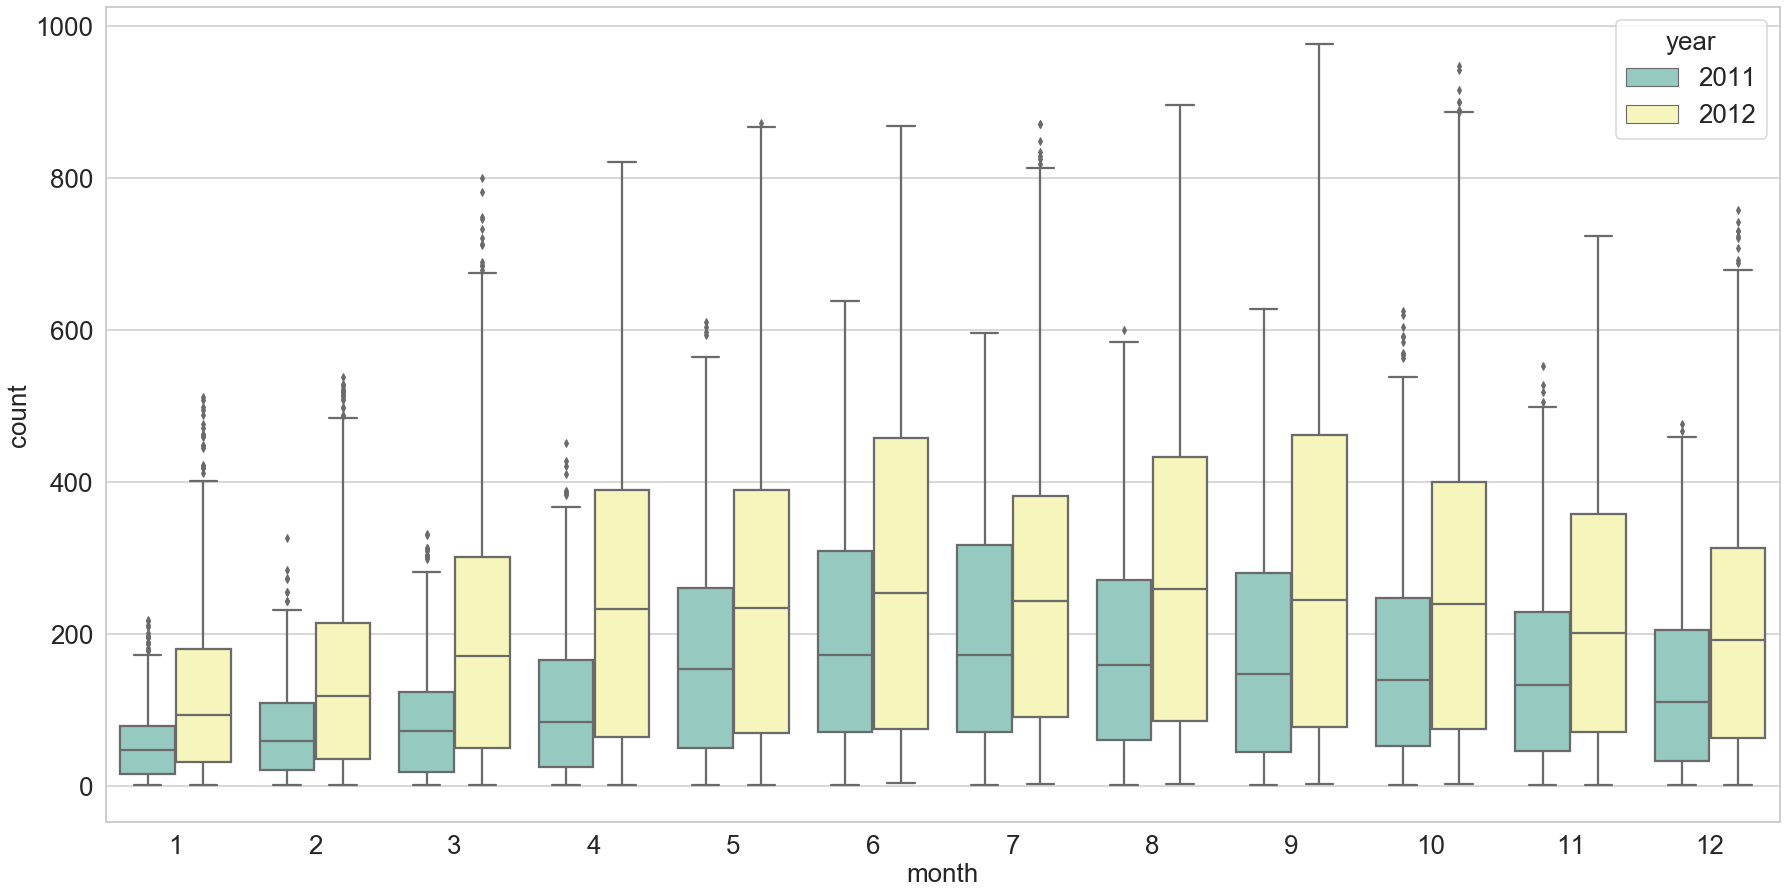

In [101]:
# box plot
sns.boxplot(x='month' , y='count' , data=df_year_month, 
            hue='year', palette='Set3')
fig=plt.gcf()

## Display correlations in a heatmap

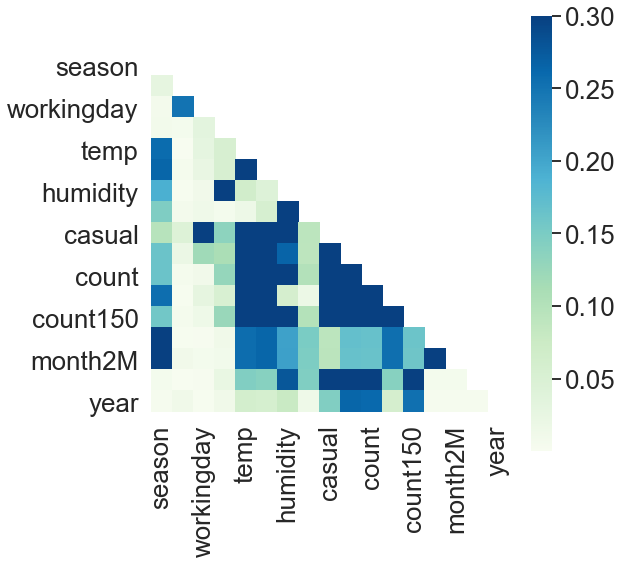

In [77]:
mask = np.triu(np.ones_like(df.corr().abs(), dtype=np.bool))

plt.figure(figsize=(8,8))
sns.heatmap(df.corr().abs(), 
            mask=mask, 
            cmap="GnBu", 
            vmax=.3,
            square=True,
            annot=False ) 